### **About Dataset**

This is Spotify Million Song Dataset. This dataset contains song names, artists names, link to the song and lyrics. This dataset can be used for recommending songs, classifying or clustering songs.

*Dataset link*: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

In [1]:
!pip install kaggle kagglehub -q


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install os json numpy pandas seaborn wordcloud sklearn nltk

ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [3]:
# File and JSON handling
import os
import json

# Numerical and tabular data processing
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text feature extraction and similarity computation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


### **Data collection**

###### Alternative way (time consuming)

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/57651-spotify-songs")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\zoro\.cache\kagglehub\datasets\joebeachcapital\57651-spotify-songs\versions\1


In [5]:
import pandas as pd

songs_df = pd.read_csv("Spotify Million Song Dataset.csv")  
print(songs_df.head())

  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \nAnd...  
1  Take it easy with me, please  \nTouch me gentl...  
2  I'll never know why I had to go  \nWhy I had t...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...  


### **Information about the dataset**

#### Overview

In [6]:
songs_df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


#### Shape

In [7]:
songs_df.shape

(57650, 4)

#### Nan values

In [8]:
songs_df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

#### Word cloud

In [9]:
df = songs_df.sample(1000)

In [10]:
all_lyrics = " ".join(df["text"].dropna())
wordcloud =  WordCloud(width=800, height=400, background_color ="white").generate(all_lyrics)

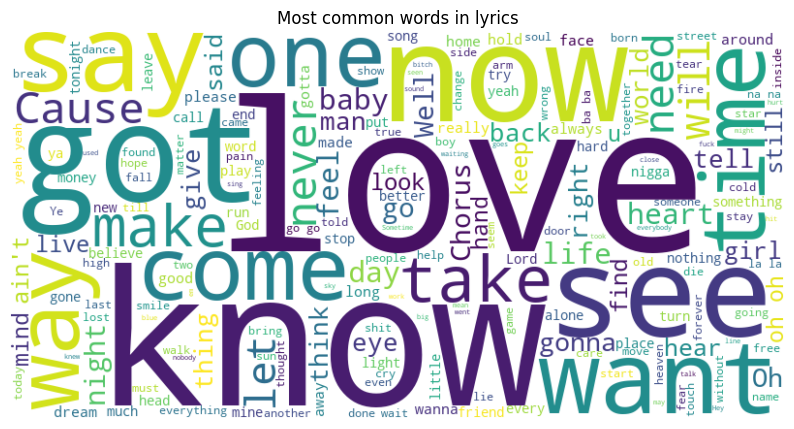

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in lyrics")
plt.show()

## **Data cleaning**

##### **Formating links**

Spotify urls

In [12]:
import urllib.parse

def generate_spotify_search_url(link):
    try:
        parts = link.strip("/").split("/")

        if len(parts) < 2:
            return None

        artist_raw = parts[0]           # e.g. ziggy+marley
        song_raw = parts[1].split("_")[0]  # e.g. good+old+days

        # Convert '+' to spaces
        artist = artist_raw.replace("+", " ")
        song = song_raw.replace("+", " ")

        # Combine for query
        query = f"{artist} {song}".strip()
        encoded_query = urllib.parse.quote_plus(query)

        return f"https://open.spotify.com/search/{encoded_query}"
    except Exception as e:
        print(f"Error parsing link '{link}': {e}")
        return None


In [13]:
songs_df["spotify_search_url"] = songs_df["link"].apply(generate_spotify_search_url)

In [14]:
songs_df

,artist,song,link,text,spotify_search_url
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd...",https://open.spotify.com/search/a+abba
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...",https://open.spotify.com/search/a+abba
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...,https://open.spotify.com/search/a+abba
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,https://open.spotify.com/search/a+abba
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,https://open.spotify.com/search/a+abba
...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...,https://open.spotify.com/search/z+ziggy+marley
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...,https://open.spotify.com/search/z+ziggy+marley
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...,https://open.spotify.com/search/z+zwan
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...,https://open.spotify.com/search/z+zwan


### **Fetching Spotify Thumbnails**

In [15]:
!pip install spotipy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

##### **Spotify Authentication setup**

uncomment to use

In [ ]:
#CLIENT_ID = 'd6acf0bb3e4f4d88950bf19e77eca8fa'
#CLIENT_SECRET = '1f6e882d49484051bb2a69519bd7ad4a'


In [ ]:

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET
))

In [18]:
import pandas as pd
from tqdm import tqdm

##### Getting tracks ids

In [19]:
def get_track_id(query):
    try:
        results = sp.search(q=query, limit=1, type='track')
        items = results['tracks']['items']
        if items:
            track = items[0]
            return track['id'], track['external_urls']['spotify'], track['album']['images'][0]['url']
        else:
            return None, None, None
    except Exception as e:
        print(f"Error during search: {e}")
        return None, None, None

In [20]:
# Test 
query = "Ziggy Marley Good Old Days"
track_id, spotify_url, thumbnail_url = get_track_id(query)
print("Track ID:", track_id)
print("Spotify URL:", spotify_url)
print("Thumbnail URL:", thumbnail_url)

Track ID: 09W6HNdg7a7bLfFIDFhoIP
Spotify URL: https://open.spotify.com/track/09W6HNdg7a7bLfFIDFhoIP
Thumbnail URL: https://i.scdn.co/image/ab67616d0000b2733c946b69fd47394d3d8a6003


In [21]:
# Function to extract search query from Spotify search URL
def extract_query_from_url(url):
    try:
        base = "https://open.spotify.com/search/"
        query = url.split(base)[-1]
        # Spotify encodes spaces as `+`, so replace them with spaces
        return query.replace("+", " ")
    except Exception as e:
        print(f"Error extracting query: {e}")
        return None

In [22]:
def get_track_info_with_delay(query, delay=1.5):
    result = get_track_id(query)
    time.sleep(delay)
    # Replace None with np.nan
    return tuple(val if val is not None else np.nan for val in result)

In [23]:
import time
import pandas as pd
from tqdm import tqdm

In [24]:
# Keep a random sample (e.g., 1,000 rows)
songs_df = songs_df.sample(n=5000, random_state=42)

In [25]:
tqdm.pandas()

# Apply the extraction and API call
results = songs_df['spotify_search_url'].progress_apply(
    lambda url: pd.Series(get_track_info_with_delay(url, delay=2))
)

# Optionally, rename the columns
results.columns = ['track_id', 'spotify_url', 'image_url']

# Merge or concatenate with the original DataFrame if needed
songs_df = pd.concat([songs_df, results], axis=1)

  0%|          | 0/5000 [00:00<?, ?it/s]

 35%|███▍      | 1735/5000 [1:09:19<3:15:15,  3.59s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 35%|███▌      | 1753/5000 [1:10:13<2:33:09,  2.83s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 38%|███▊      | 1896/5000 [1:16:13<3:21:56,  3.90s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 42%|████▏     | 2119/5000 [1:25:11<2:11:14,  2.73s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 44%|████▎     | 2180/5000 [1:27:53<2:21:29,  3.01s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 46%|████▋     | 2319/5000 [1:34:04<2:19:53,  3.13s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 47%|████▋     | 2326/5000 [1:34:30<2:12:38,  2.98s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 47%|████▋     | 2340/5000 [1:35:13<1:58:16,  2.67s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 58%|█████▊    | 2899/5000 [1:58:16<1:26:42,  2.48s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 58%|█████▊    | 2909/5000 [1:58:47<1:47:10,  3.08s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 58%|█████▊    | 2919/5000 [1:59:18<1:51:17,  3.21s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 59%|█████▊    | 2931/5000 [1:59:56<1:40:33,  2.92s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 59%|█████▉    | 2938/5000 [2:00:19<1:42:15,  2.98s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 59%|█████▉    | 2944/5000 [2:00:43<2:02:43,  3.58s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 59%|█████▉    | 2958/5000 [2:01:30<1:48:36,  3.19s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 59%|█████▉    | 2968/5000 [2:08:52<70:47:16, 125.41s/it]

Error during search: HTTPSConnectionPool(host='accounts.spotify.com', port=443): Max retries exceeded with url: /api/token (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000218B313B610>: Failed to resolve 'accounts.spotify.com' ([Errno 11001] getaddrinfo failed)"))


 62%|██████▏   | 3098/5000 [2:14:40<1:47:49,  3.40s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 62%|██████▏   | 3106/5000 [2:15:11<2:09:02,  4.09s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 62%|██████▏   | 3113/5000 [2:15:35<1:35:17,  3.03s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 62%|██████▏   | 3115/5000 [2:15:45<2:02:32,  3.90s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 62%|██████▏   | 3119/5000 [2:16:02<1:57:21,  3.74s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 63%|██████▎   | 3133/5000 [2:16:53<2:02:36,  3.94s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 63%|██████▎   | 3141/5000 [2:17:23<2:11:28,  4.24s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 64%|██████▎   | 3178/5000 [2:19:11<1:24:19,  2.78s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 66%|██████▌   | 3281/5000 [2:23:41<1:15:08,  2.62s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 66%|██████▌   | 3295/5000 [2:24:26<1:52:04,  3.94s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|██████▉   | 3478/5000 [2:32:13<1:33:18,  3.68s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|██████▉   | 3486/5000 [2:32:39<1:06:50,  2.65s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|██████▉   | 3490/5000 [2:32:55<1:26:17,  3.43s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|██████▉   | 3498/5000 [2:33:21<1:17:32,  3.10s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|███████   | 3504/5000 [2:33:41<1:09:14,  2.78s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|███████   | 3516/5000 [2:34:16<1:04:54,  2.62s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|███████   | 3522/5000 [2:34:36<1:07:00,  2.72s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 70%|███████   | 3524/5000 [2:34:49<1:55:44,  4.70s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 71%|███████   | 3531/5000 [2:35:13<1:10:24,  2.88s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 71%|███████   | 3537/5000 [2:35:32<1:07:57,  2.79s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 72%|███████▏  | 3601/5000 [2:38:28<1:19:16,  3.40s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 73%|███████▎  | 3673/5000 [2:41:50<1:13:52,  3.34s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 74%|███████▎  | 3687/5000 [2:42:38<1:07:34,  3.09s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 74%|███████▍  | 3690/5000 [2:42:52<1:22:49,  3.79s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 74%|███████▍  | 3712/5000 [2:44:02<1:24:58,  3.96s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 74%|███████▍  | 3720/5000 [2:44:27<59:45,  2.80s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 74%|███████▍  | 3724/5000 [2:44:44<1:22:15,  3.87s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 75%|███████▍  | 3728/5000 [2:45:01<1:21:03,  3.82s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 75%|███████▌  | 3758/5000 [2:46:39<1:20:23,  3.88s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 75%|███████▌  | 3769/5000 [2:47:30<1:19:17,  3.86s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 76%|███████▌  | 3775/5000 [2:47:49<58:21,  2.86s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 76%|███████▌  | 3783/5000 [2:48:19<1:20:23,  3.96s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 76%|███████▌  | 3804/5000 [2:49:26<1:02:56,  3.16s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 76%|███████▋  | 3813/5000 [2:50:10<1:21:40,  4.13s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 76%|███████▋  | 3822/5000 [2:50:38<58:16,  2.97s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 77%|███████▋  | 3826/5000 [2:51:20<2:26:30,  7.49s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 77%|███████▋  | 3829/5000 [2:51:35<1:53:19,  5.81s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 77%|███████▋  | 3836/5000 [2:52:00<1:10:46,  3.65s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 77%|███████▋  | 3862/5000 [2:53:14<49:48,  2.63s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 78%|███████▊  | 3910/5000 [2:55:33<1:14:59,  4.13s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 78%|███████▊  | 3919/5000 [2:56:03<56:25,  3.13s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 79%|███████▊  | 3930/5000 [2:56:43<1:04:01,  3.59s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 79%|███████▊  | 3936/5000 [2:57:03<49:48,  2.81s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 79%|███████▉  | 3942/5000 [2:57:23<48:56,  2.78s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 79%|███████▉  | 3951/5000 [2:57:55<1:12:35,  4.15s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 79%|███████▉  | 3958/5000 [2:58:18<51:16,  2.95s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 82%|████████▏ | 4107/5000 [3:05:07<51:09,  3.44s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 82%|████████▏ | 4121/5000 [3:05:50<38:31,  2.63s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 83%|████████▎ | 4165/5000 [3:08:23<51:26,  3.70s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 83%|████████▎ | 4173/5000 [3:08:50<47:34,  3.45s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 84%|████████▍ | 4190/5000 [3:09:39<35:36,  2.64s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 84%|████████▍ | 4199/5000 [3:10:14<57:08,  4.28s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 84%|████████▍ | 4206/5000 [3:10:38<46:12,  3.49s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 86%|████████▌ | 4291/5000 [3:14:46<41:32,  3.52s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 86%|████████▌ | 4299/5000 [3:15:12<35:58,  3.08s/it]

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 86%|████████▋ | 4317/5000 [3:16:40<34:29,  3.03s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 86%|████████▋ | 4321/5000 [3:17:03<49:38,  4.39s/it]  

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


 99%|█████████▉| 4954/5000 [3:52:38<01:51,  2.42s/it]    

Error during search: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


100%|██████████| 5000/5000 [3:54:38<00:00,  2.82s/it]


In [26]:
songs_df

,artist,song,link,text,spotify_search_url,track_id,spotify_url,image_url
56679,Wishbone Ash,Right Or Wrong,/w/wishbone+ash/right+or+wrong_20147150.html,Like to have you 'round \nWith all the lies t...,https://open.spotify.com/search/w+wishbone+ash,5AEBVsoOdhfRciYeETpiNO,https://open.spotify.com/track/5AEBVsoOdhfRciY...,https://i.scdn.co/image/ab67616d0000b27318aadc...
224,Aerosmith,This Little Light Of Mine,/a/aerosmith/this+little+light+of+mine_2064448...,"This Little Light of Mine (Light of Mine), \n...",https://open.spotify.com/search/a+aerosmith,7j4G1H6oSFXJNMj5MdRKts,https://open.spotify.com/track/7j4G1H6oSFXJNMj...,https://i.scdn.co/image/ab67616d0000b273a7ab57...
32457,Fall Out Boy,"Dance, Dance",/f/fall+out+boy/dance+dance_10113666.html,She says she's no good with words but I'm wors...,https://open.spotify.com/search/f+fall+out+boy,0bApx8pMnWr8uh4lyFCGPV,https://open.spotify.com/track/0bApx8pMnWr8uh4...,https://i.scdn.co/image/ab67616d0000b273bb34c0...
9167,Janis Joplin,Easy Rider,/j/janis+joplin/easy+rider_10147381.html,"Hey mama, mama, come a look at sister, \nShe'...",https://open.spotify.com/search/j+janis+joplin,5Ci6Y0WpFax3Qp7PIBKfwk,https://open.spotify.com/track/5Ci6Y0WpFax3Qp7...,https://i.scdn.co/image/ab67616d0000b27358220a...
13270,Moody Blues,Peak Hour,/m/moody+blues/peak+hour_20291295.html,I see it all through my window it seems. \nNe...,https://open.spotify.com/search/m+moody+blues,5ewSEsuWjrAXHVqW3KOoM0,https://open.spotify.com/track/5ewSEsuWjrAXHVq...,https://i.scdn.co/image/ab67616d0000b27363b2b9...
...,...,...,...,...,...,...,...,...
15274,Outkast,Prototype,/o/outkast/prototype_10198162.html,"I hope that you're the one \nIf not, you are ...",https://open.spotify.com/search/o+outkast,18pIEEGWFYvsLuLFwGMenD,https://open.spotify.com/track/18pIEEGWFYvsLuL...,https://i.scdn.co/image/ab67616d0000b2730c4094...
821,Arlo Guthrie,Ridin' Down The Canyon,/a/arlo+guthrie/ridin+down+the+canyon_20303863...,When evening chores are over at the ranch hous...,https://open.spotify.com/search/a+arlo+guthrie,6nE1zJZLbYoUEVYA2ErxjY,https://open.spotify.com/track/6nE1zJZLbYoUEVY...,https://i.scdn.co/image/ab67616d0000b273fc696e...
23364,Alice Cooper,"Can't Sleep, Clowns Will Eat Me",/a/alice+cooper/cant+sleep+clowns+will+eat+me_...,Don't sing me lullabies \nI won't close my ey...,https://open.spotify.com/search/a+alice+cooper,3x5AS0rFviM2L7YYdhEUvc,https://open.spotify.com/track/3x5AS0rFviM2L7Y...,https://i.scdn.co/image/ab67616d0000b27368e143...
48860,Poison,Emperors's New Clothes,/p/poison/emperorss+new+clothes_20479592.html,Now that you've been bought and sold \nYou do...,https://open.spotify.com/search/p+poison,3uOKjqP32UMRWMQv0H3w9s,https://open.spotify.com/track/3uOKjqP32UMRWMQ...,https://i.scdn.co/image/ab67616d0000b273bf4c25...


In [27]:
songs_df = songs_df.drop('link', axis=1).reset_index(drop=True)

In [28]:
songs_df

,artist,song,text,spotify_search_url,track_id,spotify_url,image_url
0,Wishbone Ash,Right Or Wrong,Like to have you 'round \nWith all the lies t...,https://open.spotify.com/search/w+wishbone+ash,5AEBVsoOdhfRciYeETpiNO,https://open.spotify.com/track/5AEBVsoOdhfRciY...,https://i.scdn.co/image/ab67616d0000b27318aadc...
1,Aerosmith,This Little Light Of Mine,"This Little Light of Mine (Light of Mine), \n...",https://open.spotify.com/search/a+aerosmith,7j4G1H6oSFXJNMj5MdRKts,https://open.spotify.com/track/7j4G1H6oSFXJNMj...,https://i.scdn.co/image/ab67616d0000b273a7ab57...
2,Fall Out Boy,"Dance, Dance",She says she's no good with words but I'm wors...,https://open.spotify.com/search/f+fall+out+boy,0bApx8pMnWr8uh4lyFCGPV,https://open.spotify.com/track/0bApx8pMnWr8uh4...,https://i.scdn.co/image/ab67616d0000b273bb34c0...
3,Janis Joplin,Easy Rider,"Hey mama, mama, come a look at sister, \nShe'...",https://open.spotify.com/search/j+janis+joplin,5Ci6Y0WpFax3Qp7PIBKfwk,https://open.spotify.com/track/5Ci6Y0WpFax3Qp7...,https://i.scdn.co/image/ab67616d0000b27358220a...
4,Moody Blues,Peak Hour,I see it all through my window it seems. \nNe...,https://open.spotify.com/search/m+moody+blues,5ewSEsuWjrAXHVqW3KOoM0,https://open.spotify.com/track/5ewSEsuWjrAXHVq...,https://i.scdn.co/image/ab67616d0000b27363b2b9...
...,...,...,...,...,...,...,...
4995,Outkast,Prototype,"I hope that you're the one \nIf not, you are ...",https://open.spotify.com/search/o+outkast,18pIEEGWFYvsLuLFwGMenD,https://open.spotify.com/track/18pIEEGWFYvsLuL...,https://i.scdn.co/image/ab67616d0000b2730c4094...
4996,Arlo Guthrie,Ridin' Down The Canyon,When evening chores are over at the ranch hous...,https://open.spotify.com/search/a+arlo+guthrie,6nE1zJZLbYoUEVYA2ErxjY,https://open.spotify.com/track/6nE1zJZLbYoUEVY...,https://i.scdn.co/image/ab67616d0000b273fc696e...
4997,Alice Cooper,"Can't Sleep, Clowns Will Eat Me",Don't sing me lullabies \nI won't close my ey...,https://open.spotify.com/search/a+alice+cooper,3x5AS0rFviM2L7YYdhEUvc,https://open.spotify.com/track/3x5AS0rFviM2L7Y...,https://i.scdn.co/image/ab67616d0000b27368e143...
4998,Poison,Emperors's New Clothes,Now that you've been bought and sold \nYou do...,https://open.spotify.com/search/p+poison,3uOKjqP32UMRWMQv0H3w9s,https://open.spotify.com/track/3uOKjqP32UMRWMQ...,https://i.scdn.co/image/ab67616d0000b273bf4c25...


### Lyrics cleaning

In [29]:
import re

def clean_lyrics(text):
    # Remove punctuation and numbers, keep only letters and spaces
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

Clean up lyrics for **vector search**

In [30]:
# Remove internal newlines
songs_df["text"] = songs_df["text"].str.replace("\n", " ", regex=False).str.strip()

# Save each song lyric on a new line
songs_df["text"].to_csv("vector_search.txt", index=False, header=False)


Clean up lyrics for **sentiment analysis**

In [31]:
# Create a cleaned version for sentiment analysis
songs_df["lyrics_cleaned"] = songs_df["text"].apply(clean_lyrics)


songs_df.to_csv("sentiment_analysis.csv", index=False)

- **songs_df["text"]** = original lyrics without line breaks (used in vector embeddings)
- **songs_df["lyrics_cleaned"]** = fully cleaned lyrics (ready for sentiment analysis)